In [1]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
drug_consumption_quantified = fetch_ucirepo(id=373) 
  
# metadata 
print(drug_consumption_quantified.metadata) 
  
# variable information 
print(drug_consumption_quantified.variables) 


{'uci_id': 373, 'name': 'Drug Consumption (Quantified)', 'repository_url': 'https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified', 'data_url': 'https://archive.ics.uci.edu/static/public/373/data.csv', 'abstract': 'Classify type of drug consumer by personality data', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1885, 'num_features': 12, 'feature_types': ['Real'], 'demographics': ['Age', 'Gender', 'Education Level', 'Nationality', 'Ethnicity'], 'target_col': ['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa'], 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C5TC7S', 'creators': ['Elaine Fehrman', 'Vincent Egan', 'Evgeny Mirkes'], 'intro_paper': {'ID': 413, 

In [7]:
# data (as pandas dataframes) 
X = drug_consumption_quantified.data.features 
y = drug_consumption_quantified.data.targets 

print(X.head())
print(y.head())

       age   gender  education  country  ethnicity   nscore   escore   oscore  \
0  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545 -0.58331   
1 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
2  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
3 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
4  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   

    ascore   cscore  impuslive       ss  
0 -0.91699 -0.00665   -0.21712 -1.18084  
1  0.76096 -0.14277   -0.71126 -0.21575  
2 -1.62090 -1.01450   -1.37983  0.40148  
3  0.59042  0.58489   -1.37983 -1.18084  
4 -0.30172  1.30612   -0.21712 -0.21575  
  alcohol amphet amyl benzos caff cannabis choc coke crack ecstasy heroin  \
0     CL5    CL2  CL0    CL2  CL6      CL0  CL5  CL0   CL0     CL0    CL0   
1     CL5    CL2  CL2    CL0  CL6      CL4  CL6  CL3   CL0     CL4    CL0   
2     CL6    CL0  CL0    CL0  

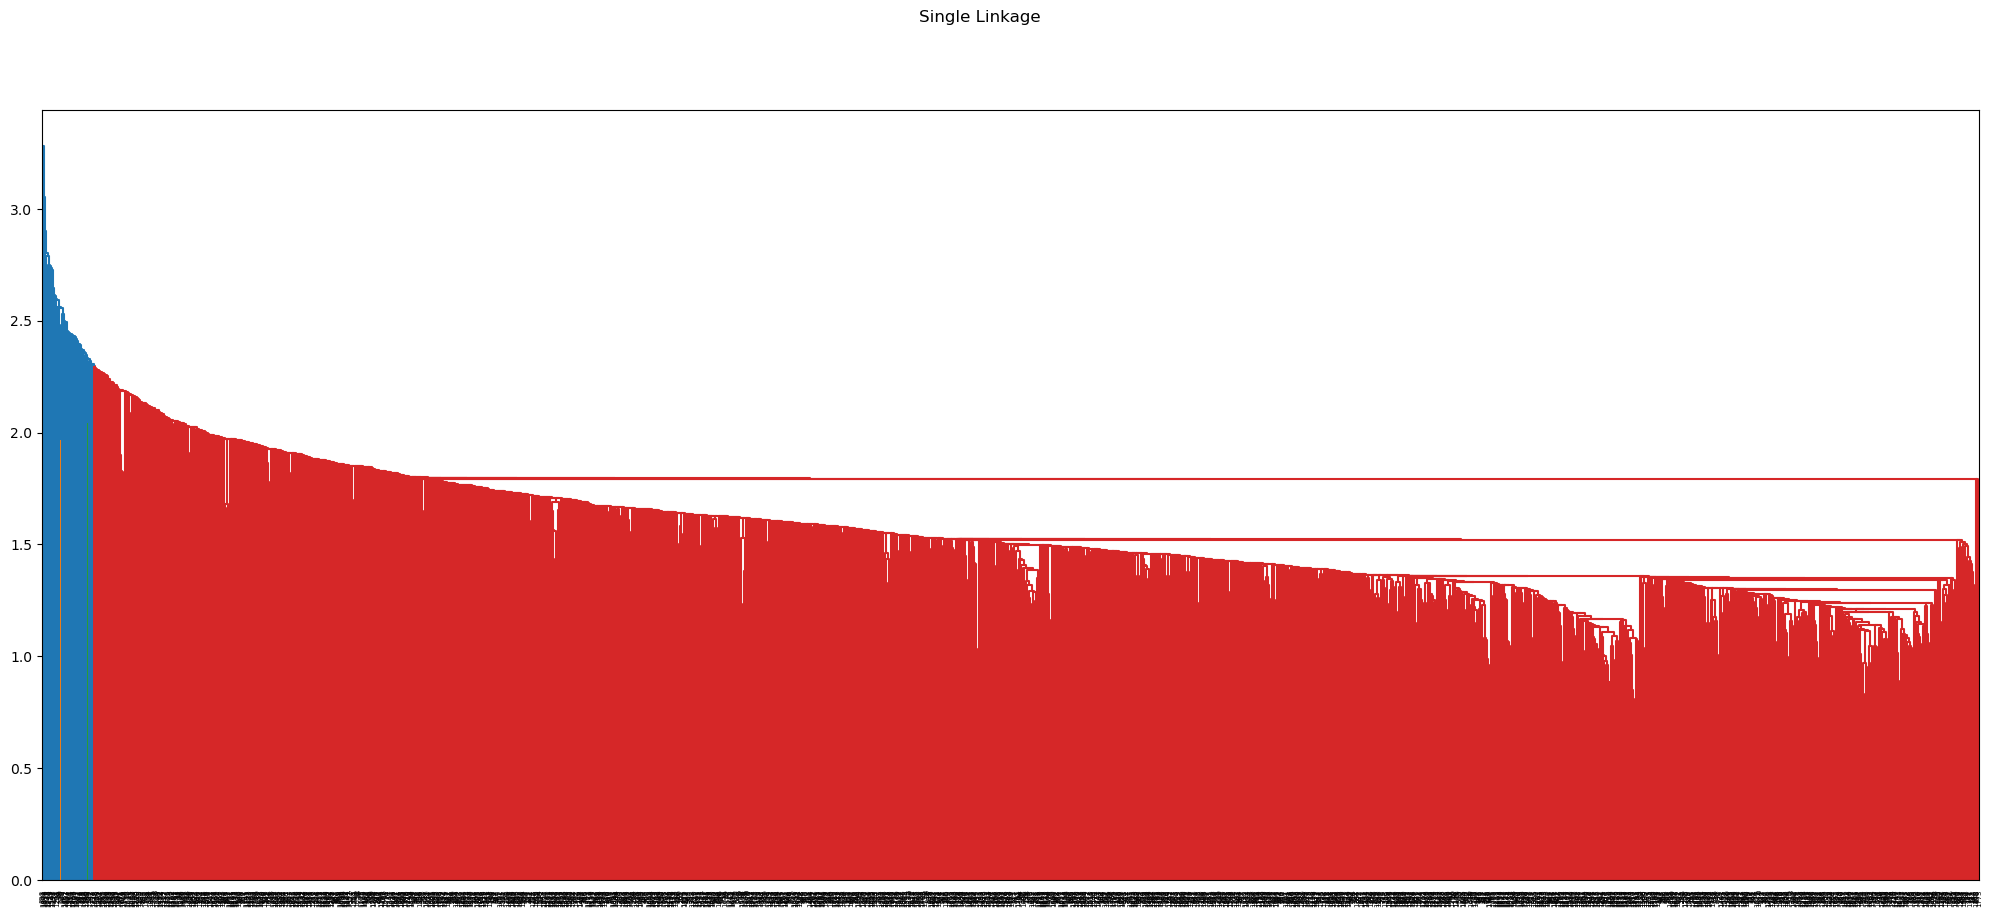

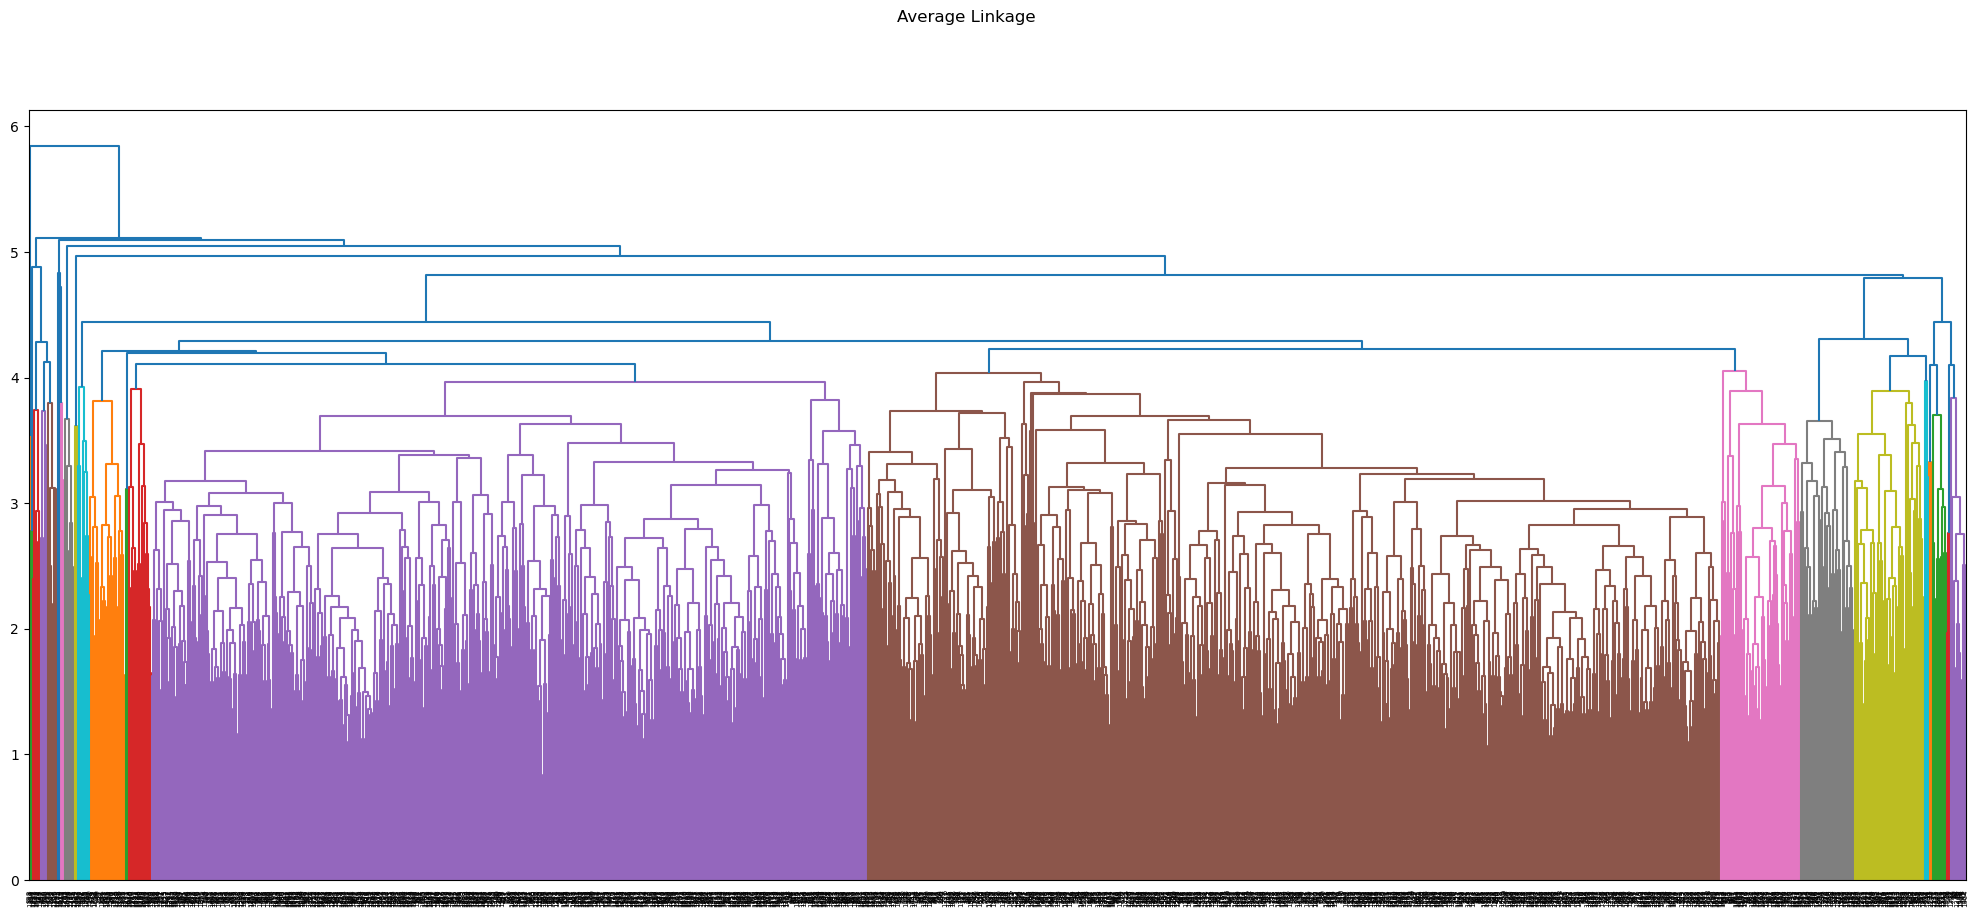

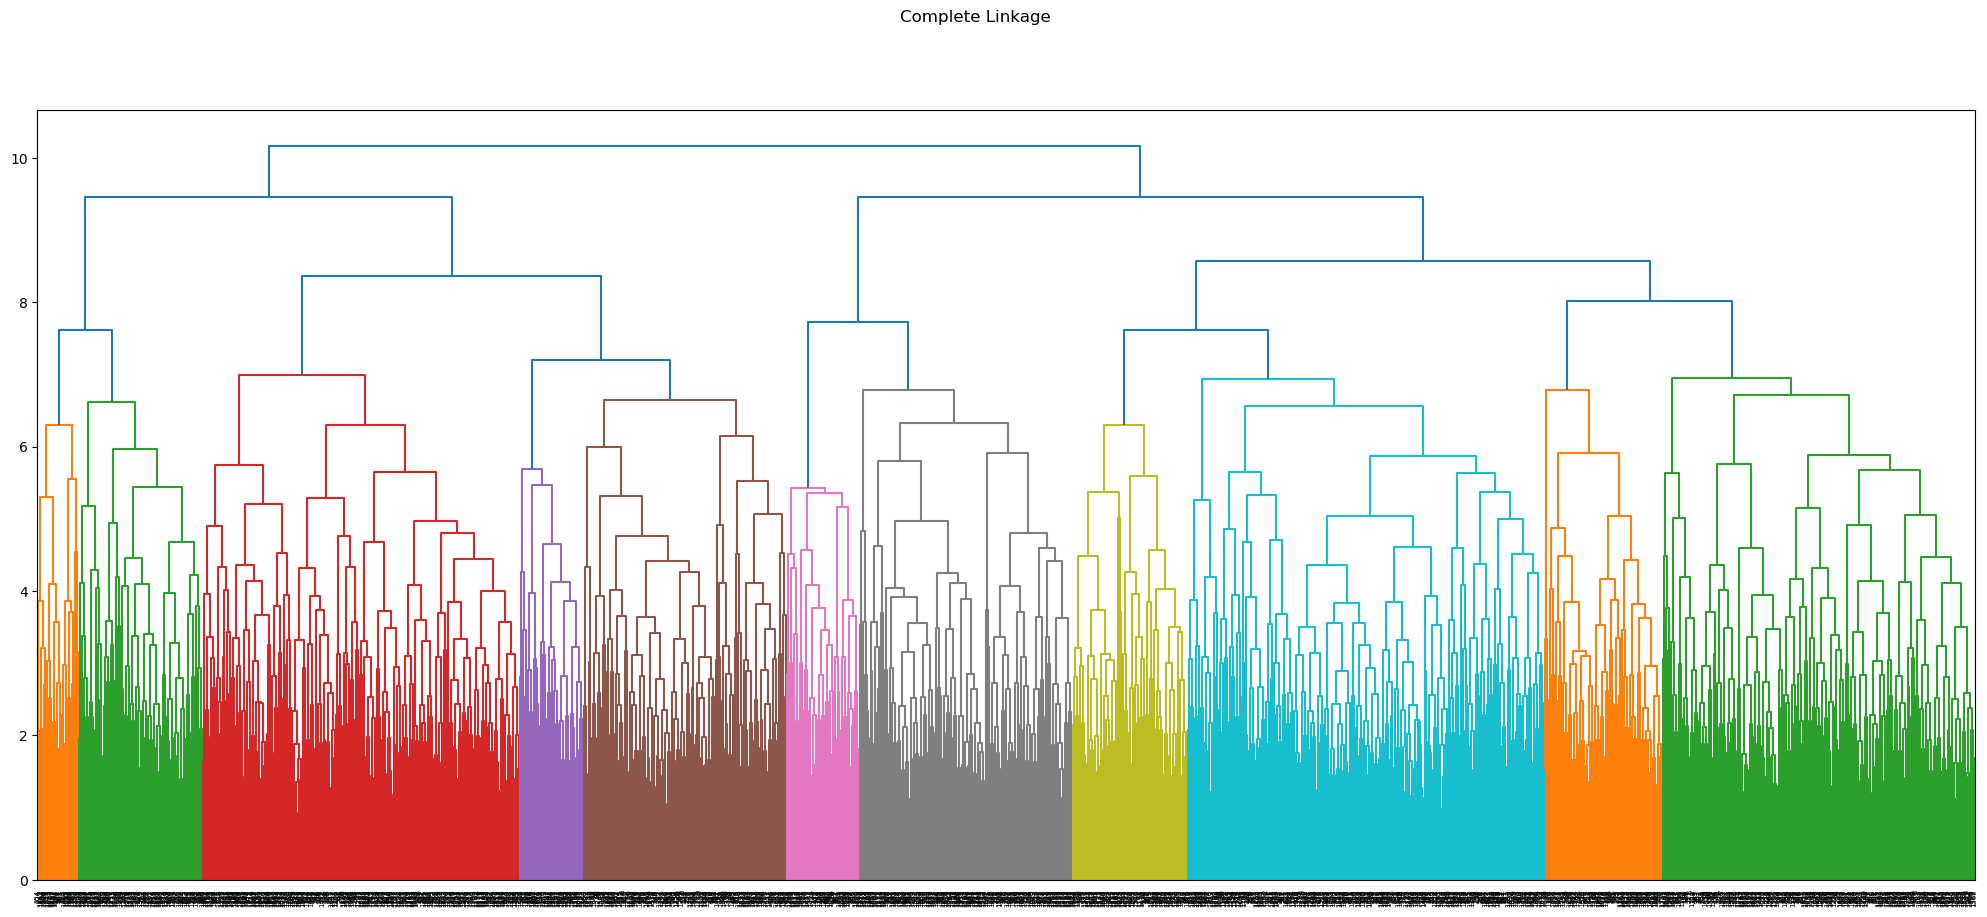

In [9]:
# Here, we begin hierarchical clustering

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib as mpl
import matplotlib.pyplot as plt

# Using Single Linkage
Z= linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
fig.suptitle("Single Linkage")
dn = dendrogram(Z) # plotting the dendrograms
plt.show()

# Using Average Linkage
Z= linkage(X, 'average')
fig = plt.figure(figsize=(25, 10))
fig.suptitle("Average Linkage")
dn = dendrogram(Z) # plotting the dendrograms
plt.show()

# Using Complete Linkage
Z= linkage(X, 'complete')
fig = plt.figure(figsize=(25, 10))
fig.suptitle("Complete Linkage")
dn = dendrogram(Z) # plotting the dendrograms
plt.show()


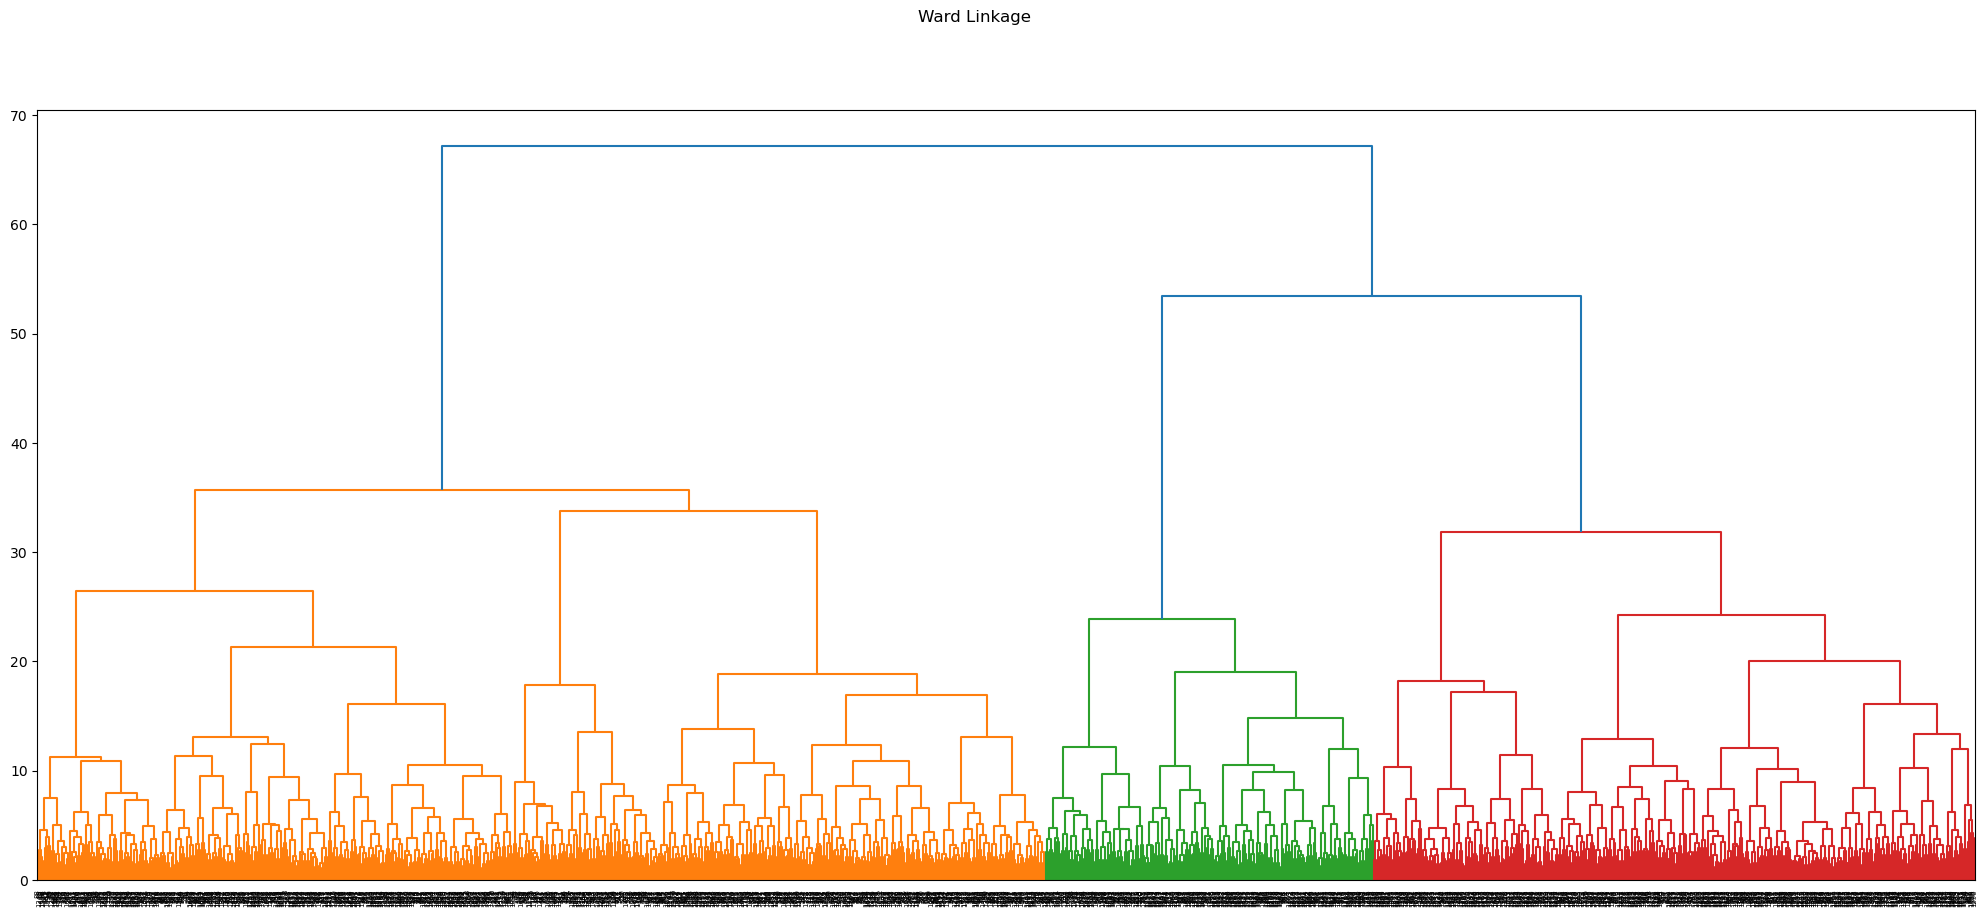

In [87]:
# Using ward linkage
# average linkage produced very uneven clusters! 
Z_ward = linkage(X, method="ward")
fig = plt.figure(figsize=(25, 10))
fig.suptitle("Ward Linkage")
dn = dendrogram(Z_ward) # plotting the dendrograms
plt.show()

In [95]:
from scipy.cluster.hierarchy import fcluster
import numpy as np
# Average seems to be the best visually, single is clearly not good due to branches and clusters
# while complete simplifies the data as well, producing neat clusters that might lose information
# Ward actually ended up being best

# Since visually it's hard to see the branches, we have to see the clusters at different heights
# Z_average = linkage(X, 'average') ENDED UP BEING SKEWED IN SIZE
Z_ward = linkage(X, method="ward")
# choosing random numbers to see where the best cutoff is
for h in [10, 20, 30, 35, 32, 40]:
    labels = fcluster(Z_ward, t=h, criterion="distance")
    print(f"Height {h} has {len(np.unique(labels))} clusters")

Height 10 has 45 clusters
Height 20 has 10 clusters
Height 30 has 6 clusters
Height 35 has 4 clusters
Height 32 has 5 clusters
Height 40 has 3 clusters


In [121]:
# Now, we assign each entry to a cluster for analysis (h=30 was chosen. this maintains cluster size while giving enough to work with)
# Additionally, 32 vs 30 led to a new subgroup being revealed that had its own distinct characteristics, meaning the subgroup was worth it
import pandas as pd

df = pd.concat([X, y], axis=1)
labels = fcluster(Z_ward, t=6, criterion="maxclust")
df["h_cluster"] = labels


In [123]:
print(df.head())

       age   gender  education  country  ethnicity   nscore   escore   oscore  \
0  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545 -0.58331   
1 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
2  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
3 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
4  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   

    ascore   cscore  ...  heroin  ketamine legalh  lsd meth mushrooms  \
0 -0.91699 -0.00665  ...     CL0       CL0    CL0  CL0  CL0       CL0   
1  0.76096 -0.14277  ...     CL0       CL2    CL0  CL2  CL3       CL0   
2 -1.62090 -1.01450  ...     CL0       CL0    CL0  CL0  CL0       CL1   
3  0.59042  0.58489  ...     CL0       CL2    CL0  CL0  CL0       CL0   
4 -0.30172  1.30612  ...     CL0       CL0    CL1  CL0  CL0       CL2   

  nicotine semer  vsa h_cluster  
0      CL2   CL0  CL0         1  
1     

In [125]:
df = df.loc[:, ~df.columns.duplicated()]
print(df.head())

       age   gender  education  country  ethnicity   nscore   escore   oscore  \
0  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545 -0.58331   
1 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
2  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
3 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
4  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   

    ascore   cscore  ...  heroin  ketamine legalh  lsd meth mushrooms  \
0 -0.91699 -0.00665  ...     CL0       CL0    CL0  CL0  CL0       CL0   
1  0.76096 -0.14277  ...     CL0       CL2    CL0  CL2  CL3       CL0   
2 -1.62090 -1.01450  ...     CL0       CL0    CL0  CL0  CL0       CL1   
3  0.59042  0.58489  ...     CL0       CL2    CL0  CL0  CL0       CL0   
4 -0.30172  1.30612  ...     CL0       CL0    CL1  CL0  CL0       CL2   

  nicotine semer  vsa h_cluster  
0      CL2   CL0  CL0         1  
1     

h_cluster
1    463
6    405
3    377
4    319
5    180
2    141
Name: count, dtype: int64
             nscore    escore    oscore    ascore    cscore        ss
h_cluster                                                            
1         -0.300454  0.009286 -0.595028  0.349759  0.622097 -0.885653
2         -0.250220 -0.044953 -0.764505  0.197502  0.139385 -0.360487
3         -0.029341 -0.045277 -0.059054 -0.085535 -0.088819  0.029117
4         -0.757089  0.959996  0.857207  0.472655  0.326327  0.571685
5          0.864734 -1.068742  0.107308  0.082553 -0.526615 -0.239150
6          0.670124 -0.234725  0.276011 -0.799106 -0.701814  0.751564


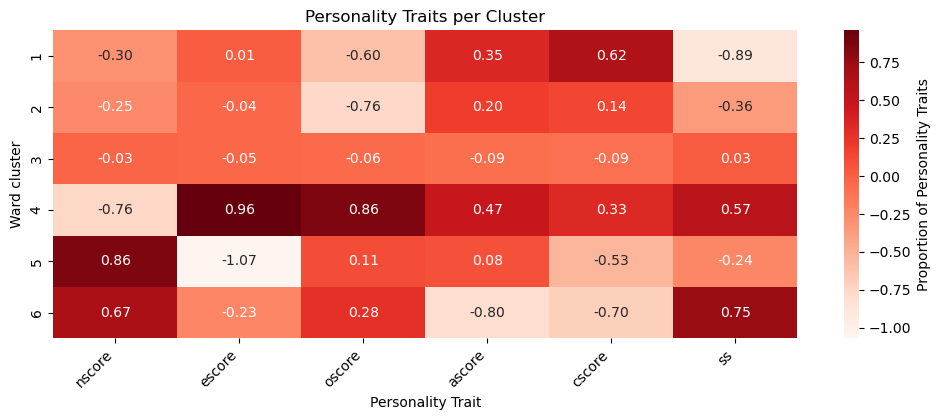

Top-3 most-used drugs per cluster:
Cluster 1: ['caff', 'choc', 'alcohol']
Cluster 2: ['caff', 'choc', 'alcohol']
Cluster 3: ['caff', 'choc', 'alcohol']
Cluster 4: ['caff', 'choc', 'alcohol']
Cluster 5: ['caff', 'choc', 'alcohol']
Cluster 6: ['caff', 'choc', 'alcohol']


C:\Users\shail\AppData\Local\Temp\ipykernel_18212\356310408.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_analysis[drug_cols] = df_analysis[drug_cols].replace(drug_usage_num)


In [209]:
# Okay, now we want to see what these demographic clusters show. Then, we will see what these groups of people who exist within the population are
# most prone to. 

# which cluster is the largest?
print(df["h_cluster"].value_counts())

# what traits are most common?
traits = ["nscore", "escore", "oscore", "ascore", "cscore", "ss"]
print(df.groupby("h_cluster")[traits].mean())

plt.figure(figsize=(12,4))
sns.heatmap(df.groupby("h_cluster")[traits].mean(),cmap="Reds",annot=True, fmt=".2f",cbar_kws={"label": "Proportion of Personality Traits"},)
plt.title("Personality Traits per Cluster")
plt.ylabel("Ward cluster")
plt.xlabel("Personality Trait")
plt.xticks(rotation=45, ha="right")

plt.show()
# what are the three most used drugs per cluster?
drug_cols = ["alcohol", "amphet", "amyl", "benzos", "caff", "cannabis", "choc", "coke", "crack", "ecstasy", "heroin", "ketamine", "legalh", "lsd",
    "meth", "mushrooms", "nicotine", "semer", "vsa"]

drug_usage_num = {'CL0':0, 'CL1':1, 'CL2':2, 'CL3':3,'CL4':4, 'CL5':5, 'CL6':6}

df_analysis = df.copy()
df_analysis[drug_cols] = df_analysis[drug_cols].replace(drug_usage_num)

cluster_drug_means = (df_analysis.groupby("h_cluster")[drug_cols].mean())

top3_dict = {}
for clust_id, row in cluster_drug_means.iterrows():
    top_drugs = row.sort_values(ascending=False)[:3].index.tolist()
    top3_dict[clust_id] = top_drugs

print("Top-3 most-used drugs per cluster:")
for clust, drugs in top3_dict.items():
    print(f"Cluster {clust}: {drugs}")


In [129]:
# lets look at it without caff and choc, both of which are legal everywhere and "everyday" items

new_drug_cols = drug_cols.copy()
for col in ["choc", "caff"]:
    if col in new_drug_cols:
        new_drug_cols.remove(col)

cluster_drug_means_two = (df_analysis.groupby("h_cluster")[new_drug_cols].mean())

# Extract the new top-3 per cluster
top3_dict_two = {}
for clust_id, row in cluster_drug_means_two.iterrows():
    top_drugs = row.sort_values(ascending=False)[:3].index.tolist()
    top3_dict_two[clust_id] = top_drugs

print("Top-3 most-used (excluding caffeine & chocolate):")
for clust, drugs in top3_dict_two.items():
    print(f"Cluster {clust}: {drugs}")

Top-3 most-used (excluding caffeine & chocolate):
Cluster 1: ['alcohol', 'nicotine', 'cannabis']
Cluster 2: ['alcohol', 'nicotine', 'cannabis']
Cluster 3: ['alcohol', 'nicotine', 'cannabis']
Cluster 4: ['alcohol', 'cannabis', 'nicotine']
Cluster 5: ['alcohol', 'cannabis', 'nicotine']
Cluster 6: ['alcohol', 'cannabis', 'nicotine']


In [131]:
# let's look at the proportion of people who have used it "recently", so like year, month, and week
drug_usage_num = {'CL0':0, 'CL1':1, 'CL2':2, 'CL3':3,'CL4':4, 'CL5':5, 'CL6':6}
n_drug_cols = ["alcohol", "amphet", "amyl", "benzos", "cannabis", "coke", "crack", "ecstasy", "heroin", "ketamine", "legalh", "lsd",
    "meth", "mushrooms", "nicotine", "semer", "vsa"]
df_2 = df.copy()
df_2[drug_cols] = df_2[drug_cols].replace(drug_usage_num)
def recent_use(series):
    # finds the recent use proportion
    return (series >= 4).mean()

proportion_table = (df_2.groupby("h_cluster")[n_drug_cols].agg(recent_use).round(3))

C:\Users\shail\AppData\Local\Temp\ipykernel_18212\123096980.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2[drug_cols] = df_2[drug_cols].replace(drug_usage_num)


In [133]:
print(proportion_table)

           alcohol  amphet   amyl  benzos  cannabis   coke  crack  ecstasy  \
h_cluster                                                                    
1            0.832   0.015  0.009   0.032     0.086  0.015  0.000    0.022   
2            0.759   0.050  0.007   0.099     0.326  0.050  0.021    0.021   
3            0.822   0.082  0.013   0.106     0.247  0.045  0.011    0.074   
4            0.887   0.169  0.038   0.150     0.683  0.138  0.006    0.257   
5            0.733   0.222  0.011   0.306     0.611  0.139  0.011    0.139   
6            0.825   0.244  0.042   0.314     0.694  0.146  0.022    0.227   

           heroin  ketamine  legalh    lsd   meth  mushrooms  nicotine  semer  \
h_cluster                                                                       
1           0.000     0.009   0.015  0.004  0.017      0.006     0.240  0.000   
2           0.021     0.014   0.021  0.028  0.057      0.007     0.496  0.000   
3           0.005     0.013   0.061  0.032  0.045  

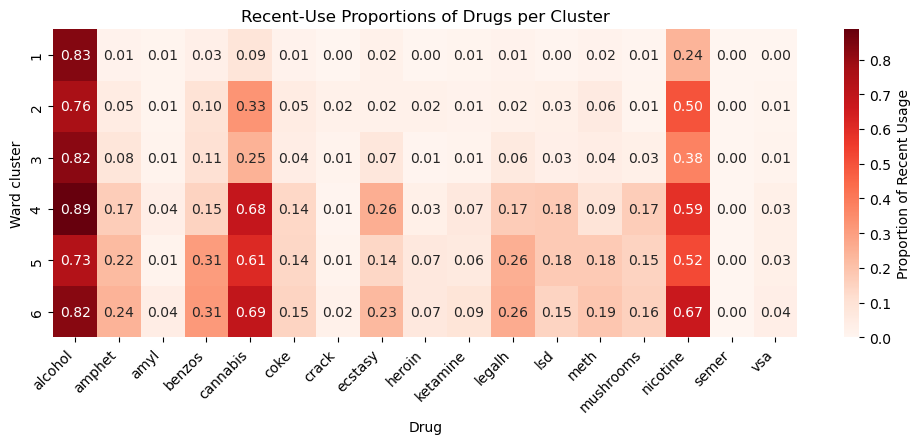

In [211]:
#correlation heatmap
import seaborn as sns

plt.figure(figsize=(12,4))
sns.heatmap(proportion_table,cmap="Reds",annot=True, fmt=".2f",cbar_kws={"label": "Proportion of Recent Usage"},)
plt.title("Recent-Use Proportions of Drugs per Cluster")
plt.ylabel("Ward cluster")
plt.xlabel("Drug")
plt.xticks(rotation=45, ha="right")

plt.show()

In [213]:
# NOW, LETS LOOK AT ALCOHOL AND CANNABIS USAGE WITH LASSO
df_2["cannabis_y"] = (df_2["cannabis"] >= 4).astype(int)
df_2["alcohol_y"]  = (df_2["alcohol"]  >= 4).astype(int)


In [215]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LogisticRegressionCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# X_hots = pd.get_dummies(X, columns=["age","gender","education","country","ethnicity"], drop_first=True)

# taken from variable selection and performance metrics labs
# modified to logit lasso since that 
# stratify keeps distribution similar in training and test sets

y_alcohol = (df_2["alcohol"] >= 4).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y_alcohol, test_size=0.30, stratify=y_alcohol, random_state=42)

# logistic regression/lasso regression is complicated, the following links were heavily referenced, i apologize if the formatting is off anywhere
# https://mycollegeai.com/fine-tuning-logistic-regression-models-using-lasso-and-ridge-regularisation/
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
# https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

# with mean=false prevents denseness
scaler = StandardScaler(with_mean=False)
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler  = scaler.transform(X_test) 

log_lasso = LogisticRegressionCV(penalty="l1",solver="saga",cv=5,scoring="roc_auc",max_iter=20000,class_weight="balanced",n_jobs=-1)

log_lasso.fit(X_train_scaler, y_train)
print("Best C chosen by CV:", log_lasso.C_[0])

Best C chosen by CV: 0.046415888336127774


Test ROC-AUC (alcohol): 0.676


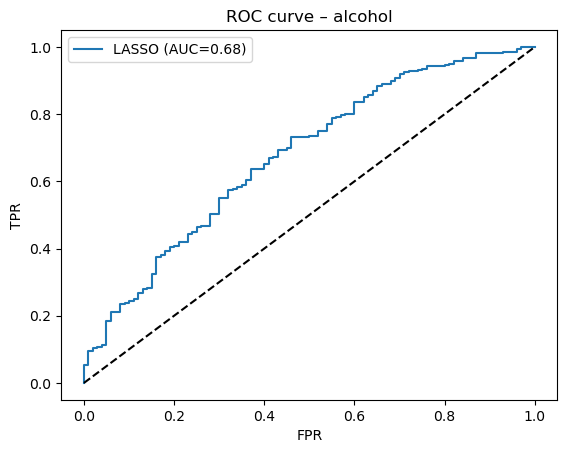

In [217]:
# now we plot roc
from sklearn.metrics import roc_auc_score, roc_curve
probs = log_lasso.predict_proba(X_test_scaler)[:, 1]
auc   = roc_auc_score(y_test, probs)
print(f"Test ROC-AUC (alcohol): {auc:.3f}")

fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr, label=f"LASSO (AUC={auc:.2f})")
plt.plot([0,1],[0,1],'k--'); plt.legend(); plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title("ROC curve – alcohol"); plt.show()


In [219]:
# now we print out the correlation coefficients

coefs = pd.Series(log_lasso.coef_.flatten(),index=X.columns)

relevant = coefs[coefs != 0]

sorted_rel = relevant.sort_values(key=abs, ascending=False)
print(sorted_rel)

education    0.218813
escore       0.204593
country      0.132592
ss           0.108233
age         -0.102782
ethnicity    0.016416
oscore       0.007497
dtype: float64


In [221]:
# Now we do it for cannabis
y_cannabis = (df_2["cannabis"] >= 4).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_cannabis, test_size=0.30, stratify=y_cannabis, random_state=42)

scaler = StandardScaler(with_mean=False)
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler  = scaler.transform(X_test) 

log_lasso = LogisticRegressionCV(penalty="l1",solver="saga",cv=5,scoring="roc_auc",max_iter=20000,class_weight="balanced",n_jobs=-1)

log_lasso.fit(X_train_scaler, y_train)
print("Best C chosen by CV:", log_lasso.C_[0])


Best C chosen by CV: 0.3593813663804626


Test ROC-AUC (cannabis): 0.845


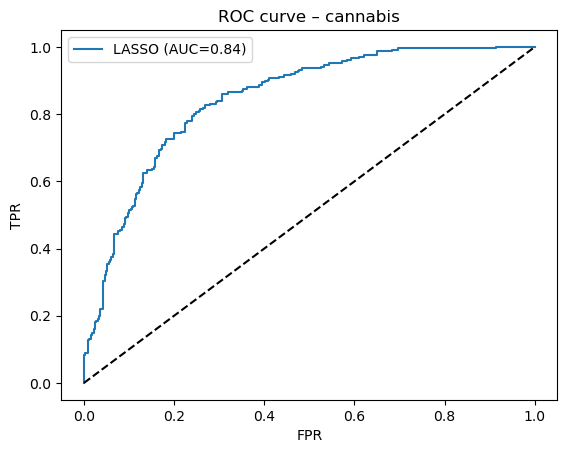

In [223]:
# now we plot roc

probs = log_lasso.predict_proba(X_test_scaler)[:, 1]
auc   = roc_auc_score(y_test, probs)
print(f"Test ROC-AUC (cannabis): {auc:.3f}")

fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr, label=f"LASSO (AUC={auc:.2f})")
plt.plot([0,1],[0,1],'k--'); plt.legend(); plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title("ROC curve – cannabis"); plt.show()


In [225]:
# now we print out the correlation coefficients
coefs = pd.Series(log_lasso.coef_.flatten(),index=X.columns)

relevant = coefs[coefs != 0]

sorted_rel = relevant.sort_values(key=abs, ascending=False)
print(sorted_rel)

country     -0.783869
age         -0.605520
oscore       0.589143
education   -0.515522
ss           0.370973
gender      -0.238484
cscore      -0.210074
nscore      -0.173260
ethnicity    0.101491
ascore       0.049294
impuslive    0.000426
dtype: float64
